In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r"D:\Projects\Loan Prediction dataset\Train_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002648,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Visualization

D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


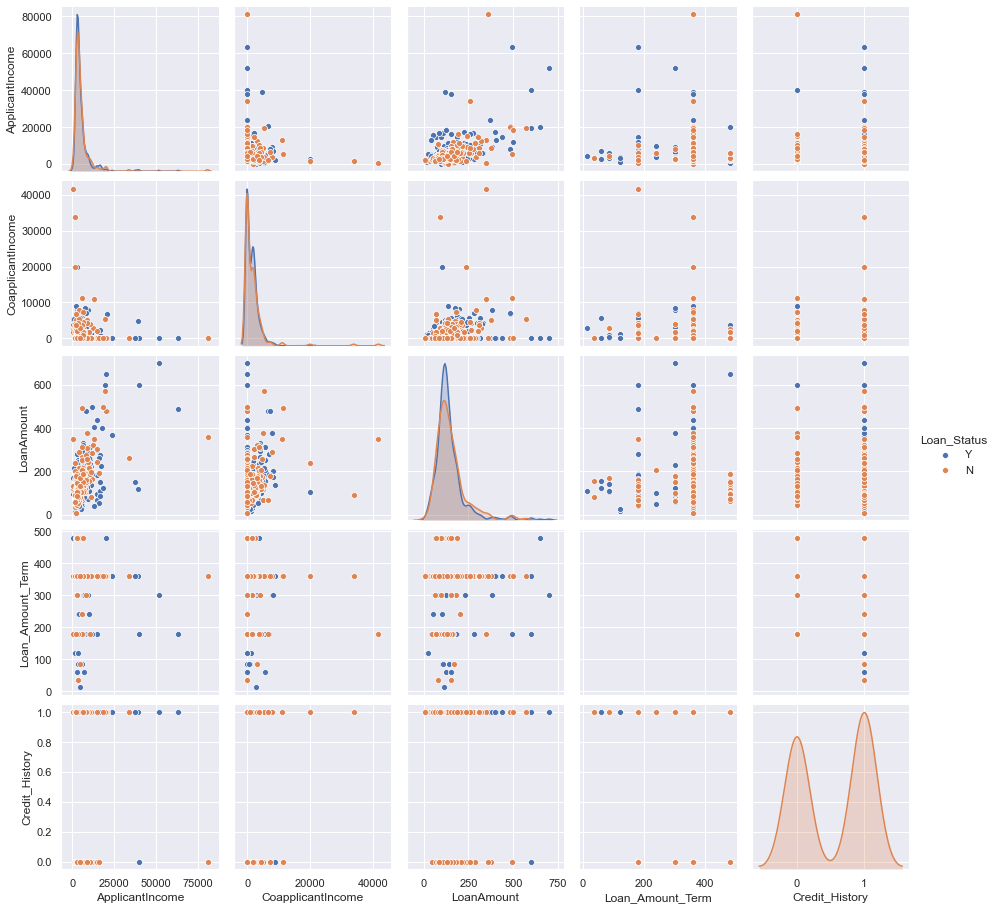

In [7]:
sns.pairplot(df, hue='Loan_Status')


## EDA

In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='object' ]
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='object']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
# To get the uniques values of numerical features

continuous_feature =[]
discrete_feature =[]

for feature in numerical_features:
    print(f'Number of uniques values in columns {feature} is: {df[feature].nunique()}')
    
    if df[feature].nunique()>15:
        continuous_feature.append(feature)
    else:
        discrete_feature.append(feature)
          

Number of uniques values in columns ApplicantIncome is: 505
Number of uniques values in columns CoapplicantIncome is: 287
Number of uniques values in columns LoanAmount is: 203
Number of uniques values in columns Loan_Amount_Term is: 10
Number of uniques values in columns Credit_History is: 2


In [11]:
continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [12]:
discrete_feature

['Loan_Amount_Term', 'Credit_History']

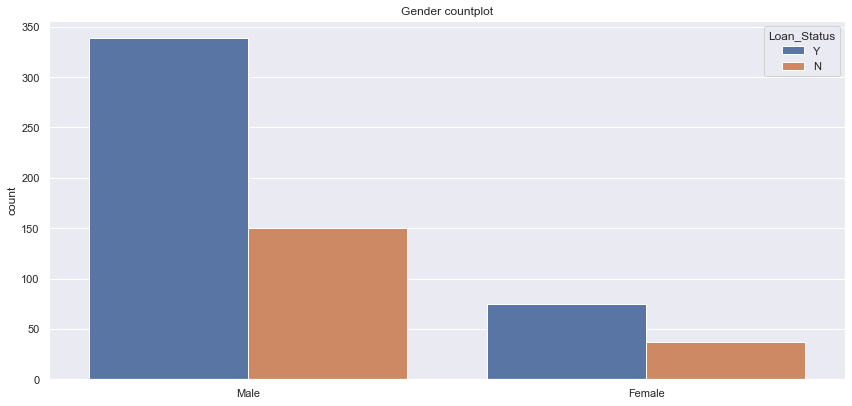

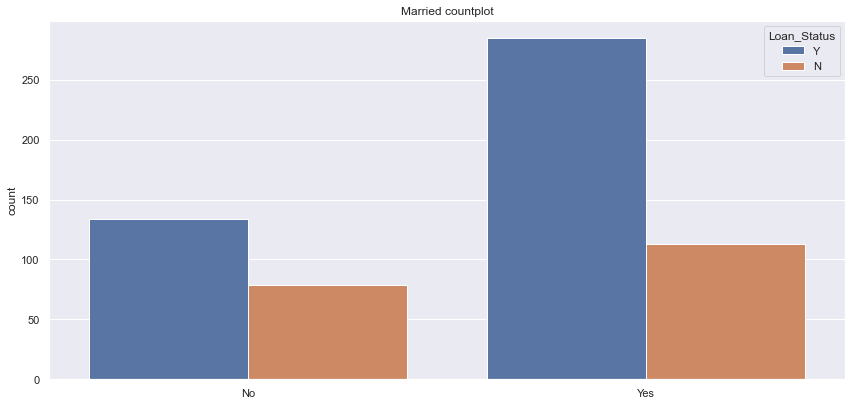

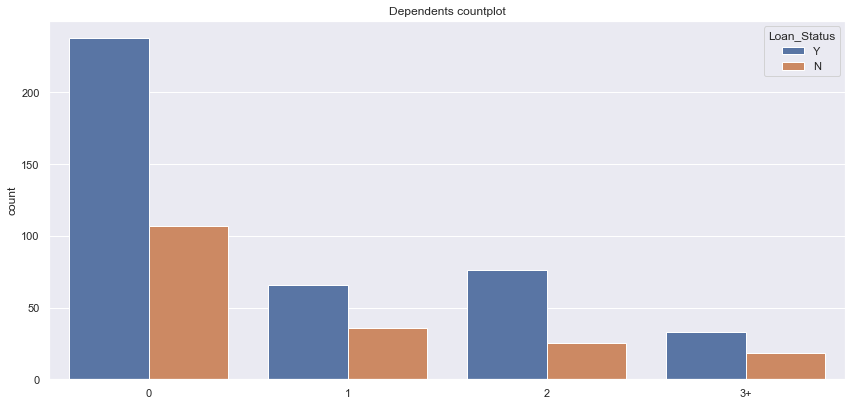

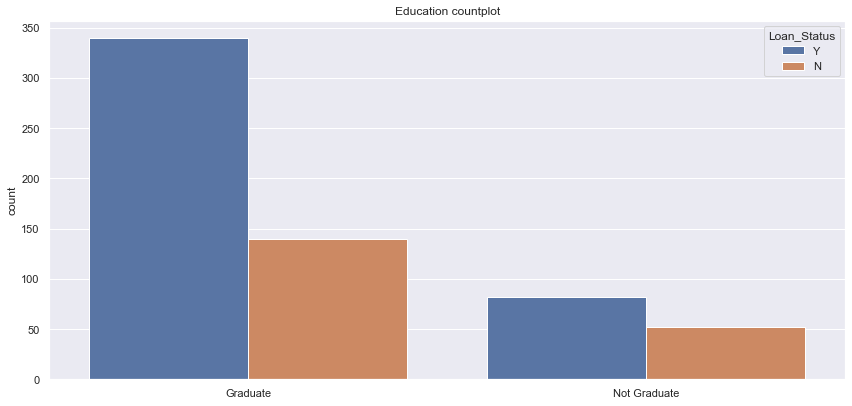

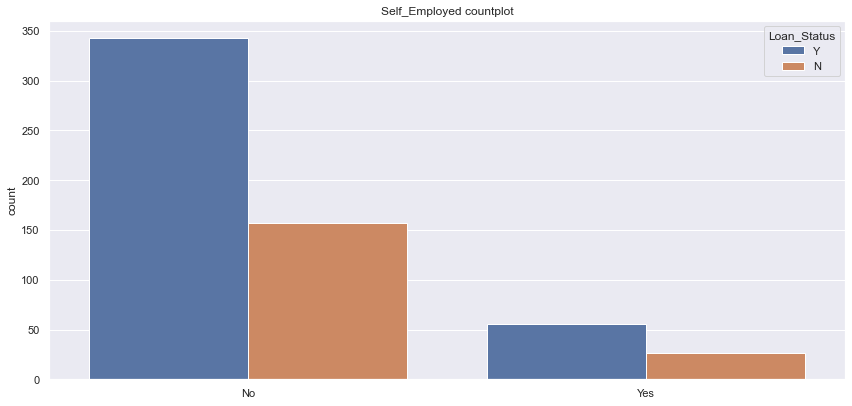

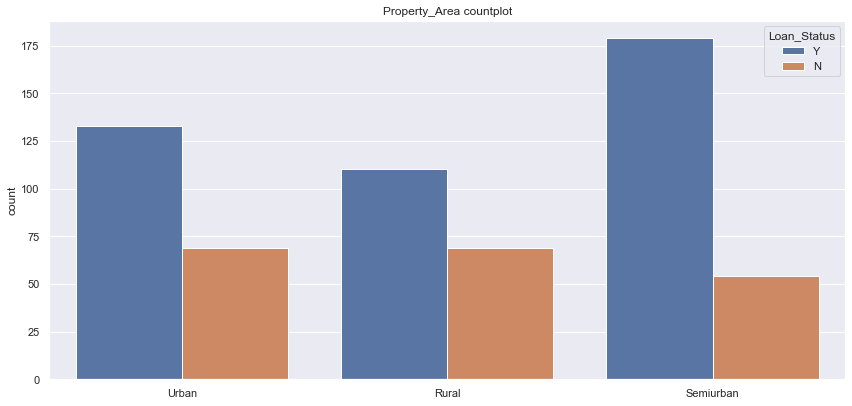

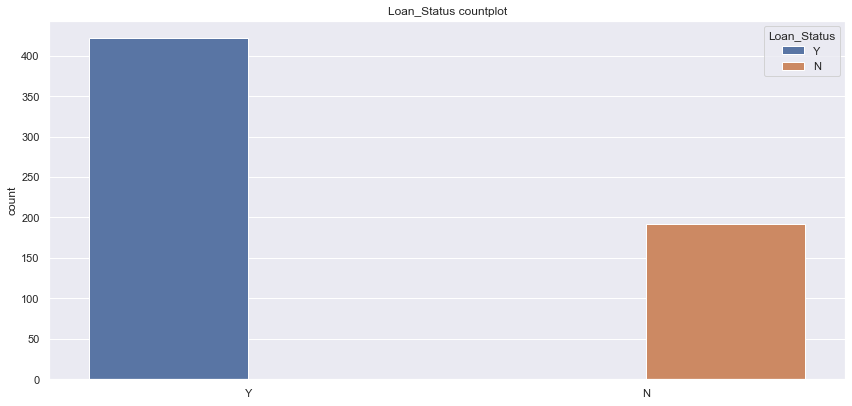

In [13]:
for feature in categorical_features[1:]:
    plt.figure(figsize=(12,6))
    sns.countplot(x=feature, data=df, hue='Loan_Status')
    plt.title(f'{feature} countplot')
    plt.tight_layout()
    plt.xlabel("")
    plt.show()

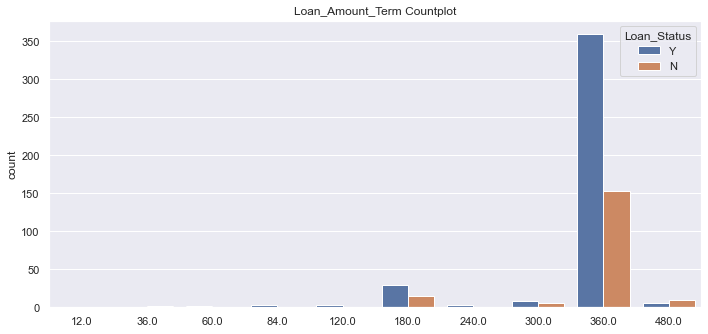

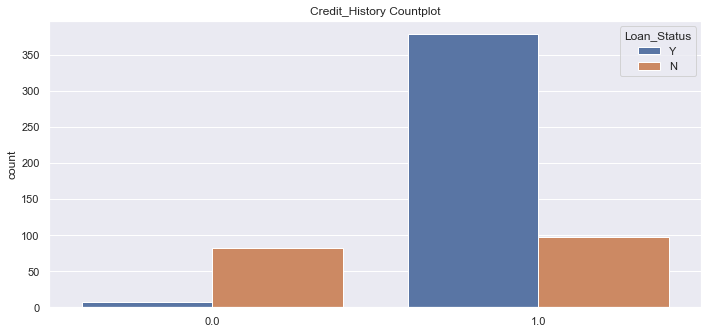

In [14]:
for feature in discrete_feature:
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature, data=df, hue='Loan_Status')
    plt.title(f'{feature} Countplot')
    plt.tight_layout()
    plt.xlabel('')
    plt.show()

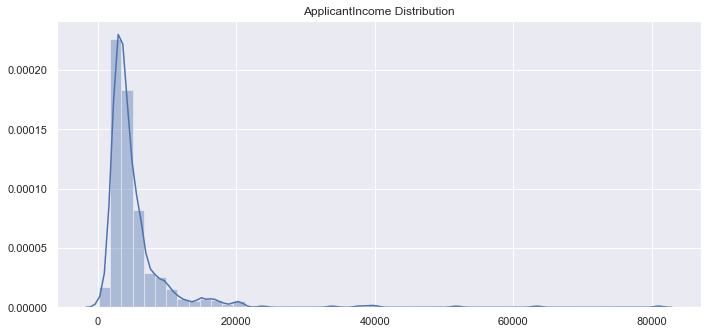

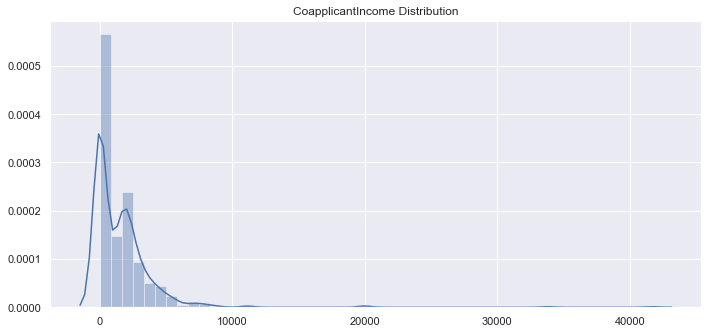

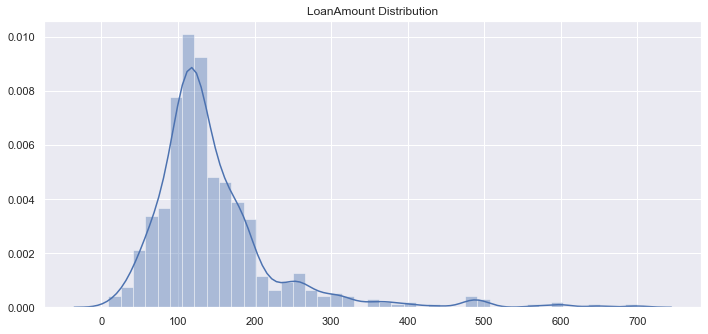

In [15]:
for feature in continuous_feature:
    plt.figure(figsize=(10,5))
    sns.distplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.tight_layout()
    plt.xlabel("")
    plt.show()

In [16]:
# checking for missing values

for feature in df.columns:
    print(f'No. of missing values in column {feature} is {sum(df[feature].isnull())}')
    print(f'Null Value percentage : {round(np.mean(df[feature].isnull())*100,2)} %\n')

No. of missing values in column Loan_ID is 0
Null Value percentage : 0.0 %

No. of missing values in column Gender is 13
Null Value percentage : 2.12 %

No. of missing values in column Married is 3
Null Value percentage : 0.49 %

No. of missing values in column Dependents is 15
Null Value percentage : 2.44 %

No. of missing values in column Education is 0
Null Value percentage : 0.0 %

No. of missing values in column Self_Employed is 32
Null Value percentage : 5.21 %

No. of missing values in column ApplicantIncome is 0
Null Value percentage : 0.0 %

No. of missing values in column CoapplicantIncome is 0
Null Value percentage : 0.0 %

No. of missing values in column LoanAmount is 22
Null Value percentage : 3.58 %

No. of missing values in column Loan_Amount_Term is 14
Null Value percentage : 2.28 %

No. of missing values in column Credit_History is 50
Null Value percentage : 8.14 %

No. of missing values in column Property_Area is 0
Null Value percentage : 0.0 %

No. of missing values 

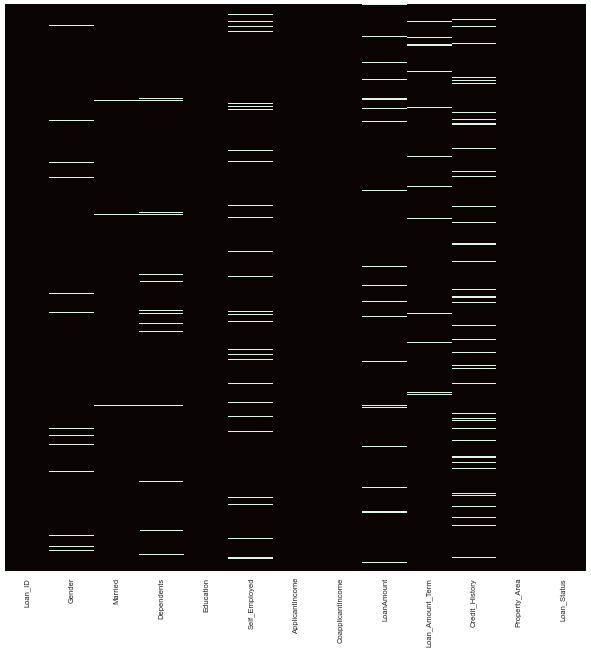

In [17]:
plt.figure(figsize=(15,15), dpi=50)
sns.heatmap(df.isnull(), yticklabels = False , cbar=False, cmap='mako')

In [18]:
for feature in categorical_features + discrete_feature:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

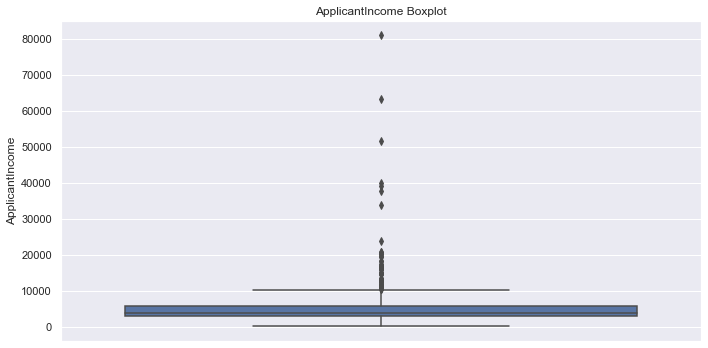

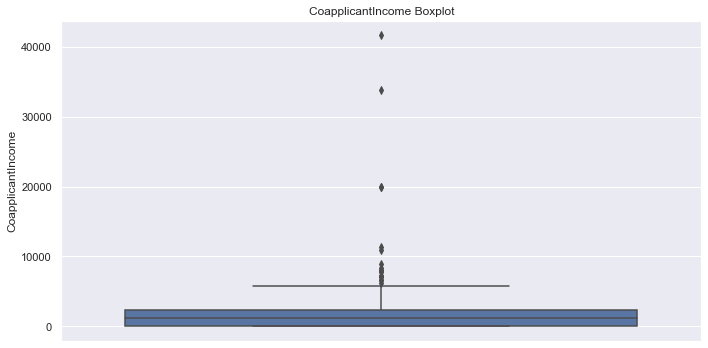

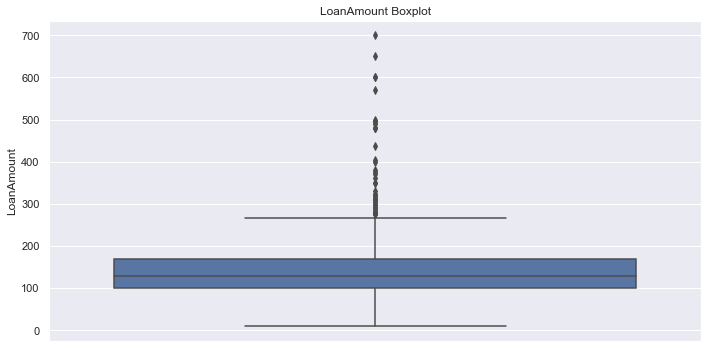

In [19]:
for feature in continuous_feature:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature} Boxplot')
    plt.tight_layout()
    plt.xlabel("")
    plt.show()
              

In [20]:
for feature in continuous_feature:
    df[feature].fillna(np.nanmedian(df[feature]), inplace=True)

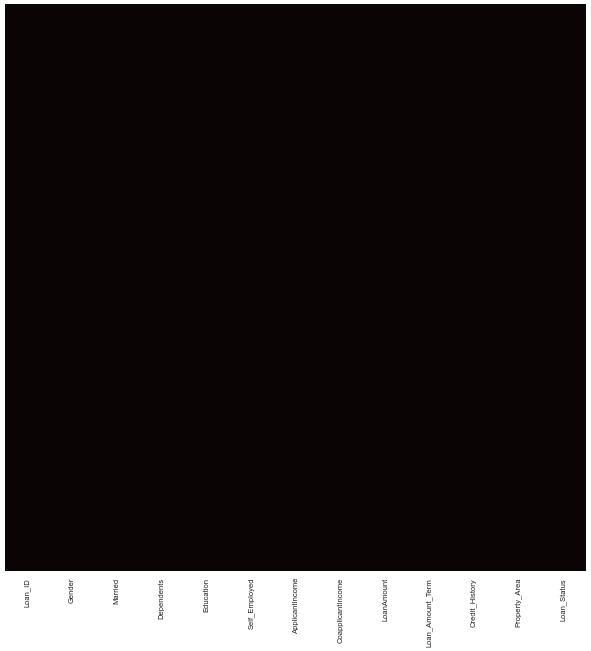

In [21]:
plt.figure(figsize=(15,15),dpi=50)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [22]:
# correlations

df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


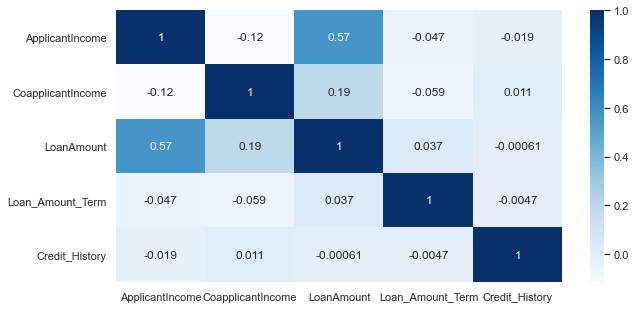

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True ,cmap='Blues')

## Encode the data

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
# Create a checkpoint
data = df.copy()

In [26]:
data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [27]:
data['Total_Amount'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [28]:
data.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents'],axis=1, inplace=True)

In [29]:
Encoded_data = pd.DataFrame()

In [30]:
for feature in data.columns:
    if data[feature].nunique()>3:
        pass
    else:
        for i in range(data[feature].nunique()-1):
            Encoded_data[feature]=np.where(str(data[feature].unique()[i])==data[feature],1,0)

D:\anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [31]:
Encoded_data

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,0,1
1,1,0,1,1,0,1,0
2,1,0,1,0,0,0,1
3,1,0,0,1,0,0,1
4,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...
609,0,1,1,1,0,1,1
610,1,0,1,1,0,1,1
611,1,0,1,1,0,0,1
612,1,0,1,1,0,0,1


In [32]:
Encoded_data['Total_Amount'] = data['Total_Amount']
Encoded_data['LoanAmount'] = data['LoanAmount']
Encoded_data['Loan_Amount_Term'] = data['Loan_Amount_Term']
Encoded_data['Credit_History'] = data['Credit_History']

In [33]:
Encoded_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Amount,LoanAmount,Loan_Amount_Term
0,1,1,1,1,1.0,0,1,5849.0,128.0,360.0
1,1,0,1,1,1.0,1,0,6091.0,128.0,360.0
2,1,0,1,0,1.0,0,1,3000.0,66.0,360.0
3,1,0,0,1,1.0,0,1,4941.0,120.0,360.0
4,1,1,1,1,1.0,0,1,6000.0,141.0,360.0


## Standardize the data

In [34]:
Standard_data = Encoded_data.copy()

In [35]:
Standard_data_to_scaled = Standard_data[['Total_Amount', 'LoanAmount', 'Loan_Amount_Term']]

In [36]:
Standard_data_to_scaled

,Total_Amount,LoanAmount,Loan_Amount_Term
0,5849.0,128.0,360.0
1,6091.0,128.0,360.0
2,3000.0,66.0,360.0
3,4941.0,120.0,360.0
4,6000.0,141.0,360.0
...,...,...,...
609,2900.0,71.0,360.0
610,4106.0,40.0,180.0
611,8312.0,253.0,360.0
612,7583.0,187.0,360.0


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
Scale = StandardScaler()

In [39]:
scaled_data= Scale.fit_transform(Standard_data_to_scaled)

In [40]:
scaled_data = pd.DataFrame(scaled_data , columns = ['Total_Amount', 'LoanAmount', 'Loan_Amount_Term'])

In [41]:
scaled_data

,Total_Amount,LoanAmount,Loan_Amount_Term
0,-0.182184,-0.211241,0.273231
1,-0.144684,-0.211241,0.273231
2,-0.623656,-0.948996,0.273231
3,-0.322885,-0.306435,0.273231
4,-0.158785,-0.056551,0.273231
...,...,...,...
609,-0.639152,-0.889500,0.273231
610,-0.452274,-1.258378,-2.522836
611,0.199475,1.276168,0.273231
612,0.086512,0.490816,0.273231


In [42]:
Standard_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Amount,LoanAmount,Loan_Amount_Term
0,1,1,1,1,1.0,0,1,5849.0,128.0,360.0
1,1,0,1,1,1.0,1,0,6091.0,128.0,360.0
2,1,0,1,0,1.0,0,1,3000.0,66.0,360.0
3,1,0,0,1,1.0,0,1,4941.0,120.0,360.0
4,1,1,1,1,1.0,0,1,6000.0,141.0,360.0


In [43]:
Standard_data.drop(['Total_Amount', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)

In [44]:
Standard_data = pd.concat([Standard_data, scaled_data], axis=1)

In [45]:
Standard_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Amount,LoanAmount,Loan_Amount_Term
0,1,1,1,1,1.0,0,1,-0.182184,-0.211241,0.273231
1,1,0,1,1,1.0,1,0,-0.144684,-0.211241,0.273231
2,1,0,1,0,1.0,0,1,-0.623656,-0.948996,0.273231
3,1,0,0,1,1.0,0,1,-0.322885,-0.306435,0.273231
4,1,1,1,1,1.0,0,1,-0.158785,-0.056551,0.273231


### Split the data into train and test data

In [46]:
inputs = Standard_data.drop(['Loan_Status'], axis=1)
target = Standard_data['Loan_Status'] 

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=25)

### Create the Model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
print('Train Accuracy: ' , model.score(x_test,y_test)*100, '%')

Train Accuracy:  80.48780487804879 %


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.47      0.62        43
           1       0.77      0.99      0.87        80

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.75       123
weighted avg       0.84      0.80      0.78       123



In [60]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[20, 23],
       [ 1, 79]], dtype=int64)

In [56]:
score = cross_val_score(model,inputs,target,cv=5)

In [57]:
print('Cross Validation: ', np.mean(score)*100,'%')

Cross Validation:  80.78368652538984 %


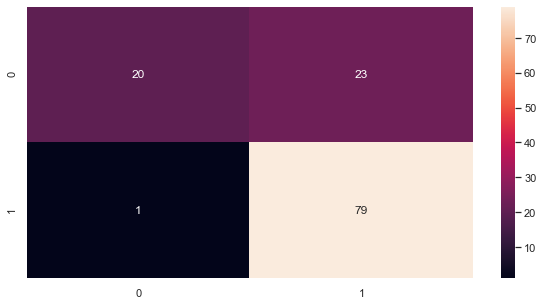

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)